In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
shroud_chat = open(r'C:\Users\Daniel\Desktop\Python Projects\Twitch_data\ICWSM19_data\shroud.pkl','rb')

df_shroud = pickle.load(shroud_chat)

In [9]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [27]:
#Some noise that we want to filter.

stop_words = ["shroud", "PogChamp", "cock", "LUL", "FAT","hi","sub","POGGER", "POGGERS", "KappaPride", "uptime", "CoolCat", "chocotPunch", "dad", "mcaT", "0_o", "hello", "new", "bukaleHan", "MrDestructoid", "gift", "fuck", "PLEB", "lol", "PLEBS", "KappaHD", "Mike", "live", "Kappa", "Hey", "HeyGuys", "PopCorn", "SeemsGood", "minutes", "seconds", "Kreygasm", "cmonBruh"] + list(STOPWORDS)

In [30]:
#Streamers have personal emotes which contain common substrings, usually containing the streamers username. We want to filter these out.

df = df_shroud['body'][~df_shroud['body'].str.contains("shroud")]

In [31]:
#We join the text to create our wordcloud.

text = " ".join(comment for comment in df.iloc[0:50000])

In [33]:
wordcloud = WordCloud(width=800, height=800, stopwords = stop_words, background_color = 'white').generate(text)

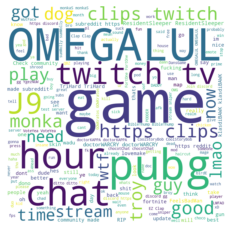

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
#Additional data counting frequency of common ways to reference a game in chat.

word_list = ['pubg','gta','fortnite','cod']

C = pd.Series({w: df_shroud['body'].str.contains(w, case=False).sum() for w in word_list})
print(C)

pubg        42567
gta           895
fortnite    21172
cod         13513
dtype: int64
